## Train and save models

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
import pickle
import xgboost as xgb

from sklearn.model_selection import train_test_split

## Data Cleaning

In [2]:
data = pd.read_csv("data/voting_2021.csv")

In [3]:
data.columns

Index(['county_id', 'state', 'county', 'NAME', 'proj_X', 'proj_Y', 'total_pop',
       'new_pct_dem', 'sex_ratio', 'pct_black', 'pct_hisp', 'pct_bach',
       'median_income', 'pct_65_over', 'pct_age_18_29', 'gini', 'pct_manuf',
       'ln_pop_den', 'pct_3rd_party', 'turn_out', 'pct_fb', 'pct_uninsured'],
      dtype='object')

In [4]:
y = data.new_pct_dem

X_coords = data[['pct_black', 'pct_hisp', 'pct_bach',
       'median_income',
       'ln_pop_den', 'pct_3rd_party', 'pct_fb', 'proj_X', 'proj_Y']]

In [5]:
coords = np.array(list(zip(X_coords.proj_X, X_coords.proj_Y)))

## Model training

In [7]:
from flaml import AutoML

model = AutoML()

settings = {
    "time_budget": 60*1, #seconds
    #"max_iter": 200, 
    "task": 'regression',
    "n_splits": 5,
    "eval_method": 'cv',
    "seed": 222,    # random seed
    "verbose":1,
    "estimator_list": ['xgboost'] 
    
}

In [8]:
import pickle
model_lists = []

In [9]:
np.random.seed(1111)

for i in range(500):
    
    #Bootstrap

    #sample_indices = np.random.choice(X_coords.index, size=len(X_coords), replace=True)

    #X_sampled = X_coords.loc[sample_indices]
    #y_sampled = y.loc[sample_indices]

    #model = AutoML()

    #model.fit(X_sampled, y_sampled, **settings)
    
    
    name = "models/model_" + str(i) + ".sav"
    
    #pickle.dump(model,open(name, 'wb'))
    
    model = pickle.load(open(name, 'rb'))
    
    model_lists.append(model)
    
    print(name, 1 - model.best_loss)

models/model_0.sav 0.939539115912495
models/model_1.sav 0.9397408250823999
models/model_2.sav 0.9378225081044625
models/model_3.sav 0.9281227076455686
models/model_4.sav 0.9376762380784424
models/model_5.sav 0.9386698438468065
models/model_6.sav 0.9386961383727088
models/model_7.sav 0.9323614662848078
models/model_8.sav 0.9346427266311068
models/model_9.sav 0.9255884371587689
models/model_10.sav 0.9337253121902228
models/model_11.sav 0.927334416035401
models/model_12.sav 0.924964316634999
models/model_13.sav 0.9282809691720626
models/model_14.sav 0.9317169937758432
models/model_15.sav 0.9333871783533311
models/model_16.sav 0.9417456818499018
models/model_17.sav 0.9332198128997757
models/model_18.sav 0.9292190730576542
models/model_19.sav 0.9387784172857946
models/model_20.sav 0.9401224201870079
models/model_21.sav 0.9387523261540662
models/model_22.sav 0.9315273174301496
models/model_23.sav 0.9280127218999419
models/model_24.sav 0.9257947224649469
models/model_25.sav 0.9297568164919231

models/model_212.sav 0.9314094911184331
models/model_213.sav 0.937908226234364
models/model_214.sav 0.9373657103850616
models/model_215.sav 0.926983793342381
models/model_216.sav 0.9352330649452207
models/model_217.sav 0.9410657142519531
models/model_218.sav 0.9319204053108713
models/model_219.sav 0.9340325623842234
models/model_220.sav 0.9319772763117499
models/model_221.sav 0.9312799818451785
models/model_222.sav 0.9272877289473322
models/model_223.sav 0.925007117004103
models/model_224.sav 0.9231634160600668
models/model_225.sav 0.9347579310130008
models/model_226.sav 0.9408419579371177
models/model_227.sav 0.9362752949337727
models/model_228.sav 0.9357635720345804
models/model_229.sav 0.9283770400772812
models/model_230.sav 0.9298202654736855
models/model_231.sav 0.9386730492002521
models/model_232.sav 0.9320562028366332
models/model_233.sav 0.930841770059286
models/model_234.sav 0.9324232268651451
models/model_235.sav 0.9414676617951677
models/model_236.sav 0.9257172639992535
mode

models/model_437.sav 0.9329996936398387
models/model_438.sav 0.9350028427227212
models/model_439.sav 0.924919676064836
models/model_440.sav 0.9327663219131024
models/model_441.sav 0.9228710507595411
models/model_442.sav 0.9412757081841113
models/model_443.sav 0.933066154726019
models/model_444.sav 0.9371417885242455
models/model_445.sav 0.9364164836824784
models/model_446.sav 0.9386218630169703
models/model_447.sav 0.9331934566299206
models/model_448.sav 0.9395789808430912
models/model_449.sav 0.9379271330981304
models/model_450.sav 0.9403182986729992
models/model_451.sav 0.9260594407851304
models/model_452.sav 0.9204336108703903
models/model_453.sav 0.944457576872836
models/model_454.sav 0.9311694547422785
models/model_455.sav 0.9414727252766583
models/model_456.sav 0.9314565999446243
models/model_457.sav 0.9379470344052512
models/model_458.sav 0.9258132222576405
models/model_459.sav 0.9343313815465373
models/model_460.sav 0.9306480615154045
models/model_461.sav 0.928057663416977
mode

In [202]:
np.mean([1 - model.best_loss for model in model_lists])

0.9334654915426724

## SHAP

In [11]:
import shap

explainer = shap.TreeExplainer(model_lists[0].model.estimator)
shap_values = explainer(X_coords)

[12:10:57] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


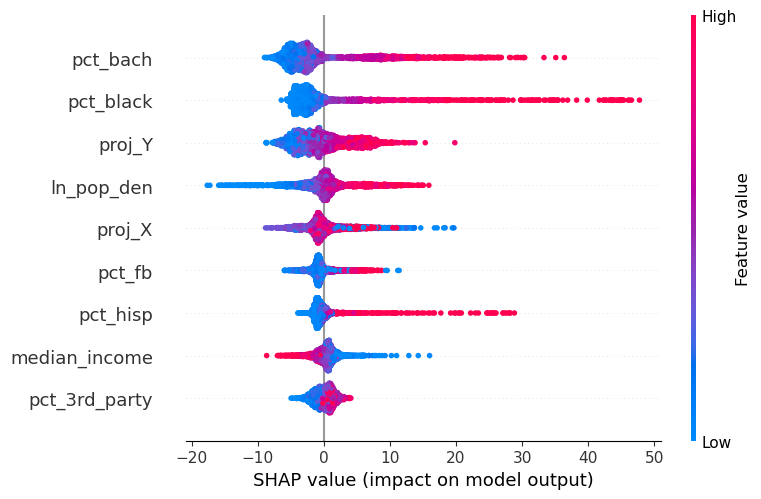

In [12]:
shap.summary_plot(shap_values)

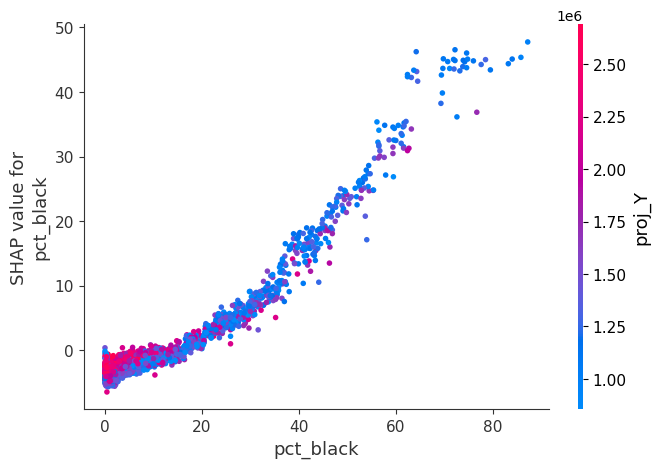

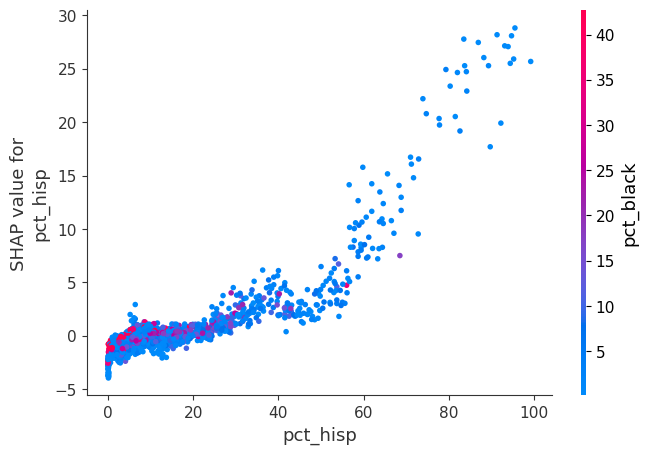

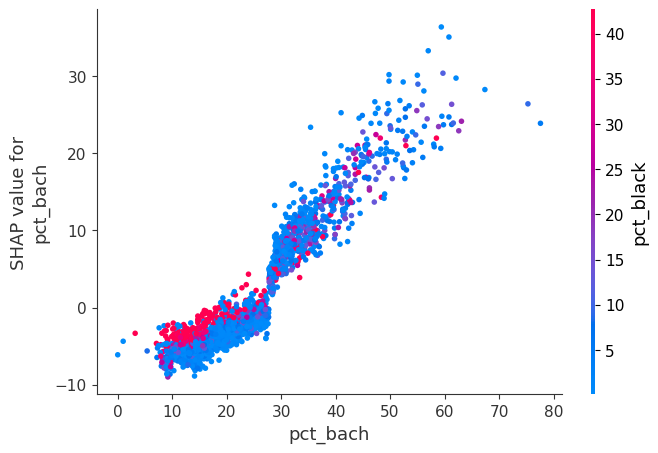

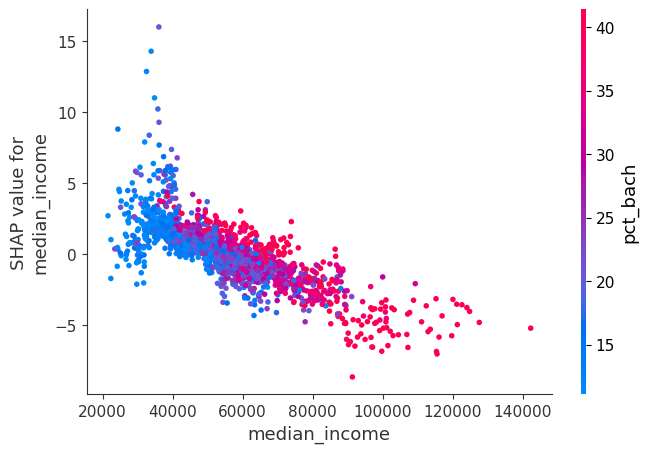

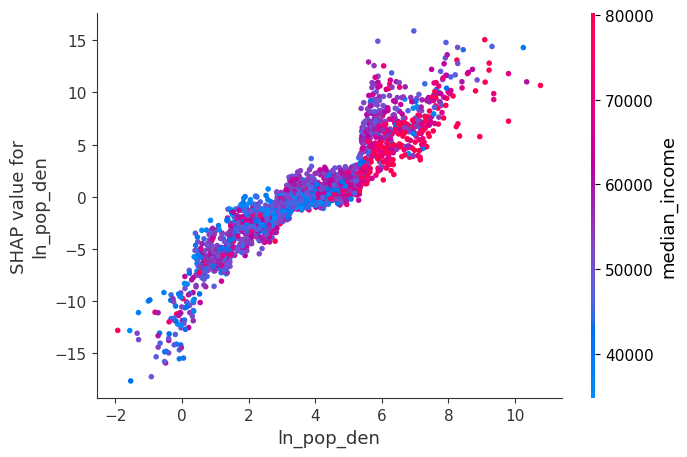

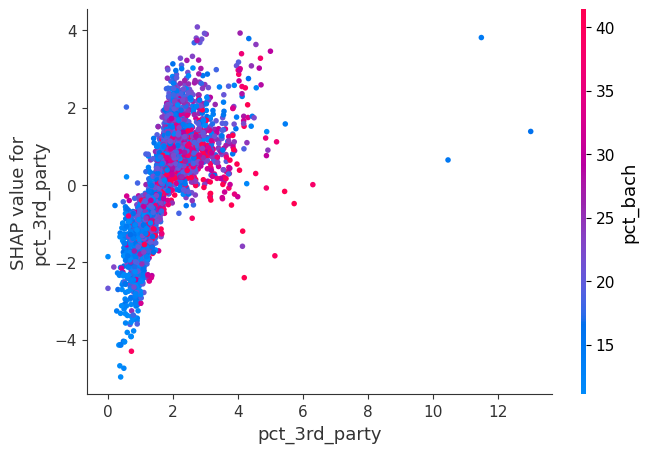

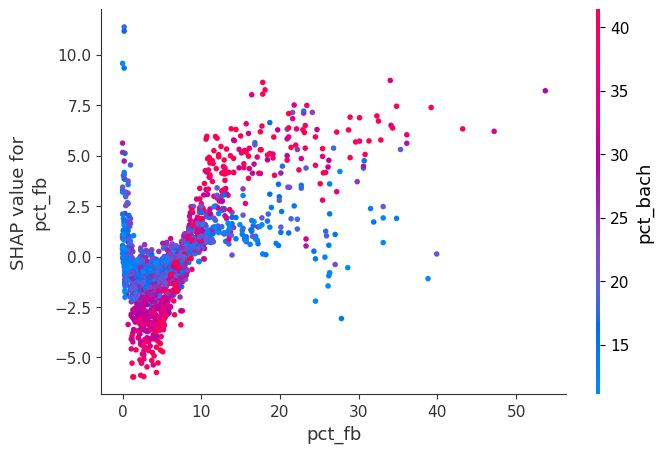

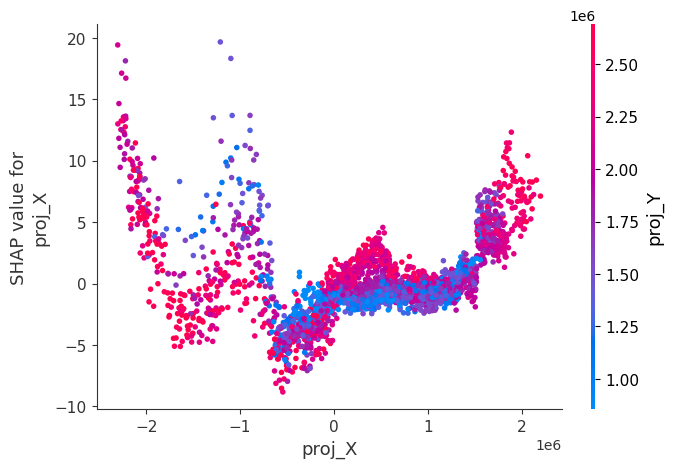

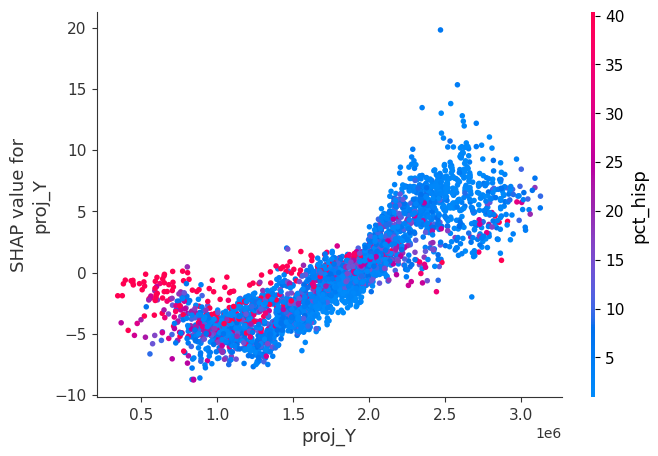

In [13]:
for feature in X_coords.columns:
    shap.dependence_plot(feature, shap_values.values, X_coords, display_features=X_coords)

## GeoShapley

In [14]:
import geoshapley
rslt_list = []

In [15]:
%%time
np.random.seed(3333)
background_X = shap.kmeans(X_coords,20).data
i = 0
for m in model_lists:
    explainer = geoshapley.GeoShapleyExplainer(m.model.estimator.predict, background_X)
    rslt = explainer.explain(X_coords,n_jobs=-1)
    rslt_list.append(rslt)
    print(i)
    i = i + 1

  0%|          | 0/3108 [00:00<?, ?it/s]

0


  0%|          | 0/3108 [00:00<?, ?it/s]

1


  0%|          | 0/3108 [00:00<?, ?it/s]

2


  0%|          | 0/3108 [00:00<?, ?it/s]

3


  0%|          | 0/3108 [00:00<?, ?it/s]

4


  0%|          | 0/3108 [00:00<?, ?it/s]

5


  0%|          | 0/3108 [00:00<?, ?it/s]

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


6


  0%|          | 0/3108 [00:00<?, ?it/s]

7


  0%|          | 0/3108 [00:00<?, ?it/s]

8


  0%|          | 0/3108 [00:00<?, ?it/s]

9


  0%|          | 0/3108 [00:00<?, ?it/s]

10


  0%|          | 0/3108 [00:00<?, ?it/s]

11


  0%|          | 0/3108 [00:00<?, ?it/s]

12


  0%|          | 0/3108 [00:00<?, ?it/s]

13


  0%|          | 0/3108 [00:00<?, ?it/s]

14


  0%|          | 0/3108 [00:00<?, ?it/s]

15


  0%|          | 0/3108 [00:00<?, ?it/s]

16


  0%|          | 0/3108 [00:00<?, ?it/s]

17


  0%|          | 0/3108 [00:00<?, ?it/s]

18


  0%|          | 0/3108 [00:00<?, ?it/s]

19


  0%|          | 0/3108 [00:00<?, ?it/s]

20


  0%|          | 0/3108 [00:00<?, ?it/s]

21


  0%|          | 0/3108 [00:00<?, ?it/s]

22


  0%|          | 0/3108 [00:00<?, ?it/s]

23


  0%|          | 0/3108 [00:00<?, ?it/s]

24


  0%|          | 0/3108 [00:00<?, ?it/s]

25


  0%|          | 0/3108 [00:00<?, ?it/s]

26


  0%|          | 0/3108 [00:00<?, ?it/s]

27


  0%|          | 0/3108 [00:00<?, ?it/s]

28


  0%|          | 0/3108 [00:00<?, ?it/s]

29


  0%|          | 0/3108 [00:00<?, ?it/s]

30


  0%|          | 0/3108 [00:00<?, ?it/s]

31


  0%|          | 0/3108 [00:00<?, ?it/s]

32


  0%|          | 0/3108 [00:00<?, ?it/s]

33


  0%|          | 0/3108 [00:00<?, ?it/s]

34


  0%|          | 0/3108 [00:00<?, ?it/s]

35


  0%|          | 0/3108 [00:00<?, ?it/s]

36


  0%|          | 0/3108 [00:00<?, ?it/s]

37


  0%|          | 0/3108 [00:00<?, ?it/s]

38


  0%|          | 0/3108 [00:00<?, ?it/s]

39


  0%|          | 0/3108 [00:00<?, ?it/s]

40


  0%|          | 0/3108 [00:00<?, ?it/s]

41


  0%|          | 0/3108 [00:00<?, ?it/s]

42


  0%|          | 0/3108 [00:00<?, ?it/s]

43


  0%|          | 0/3108 [00:00<?, ?it/s]

44


  0%|          | 0/3108 [00:00<?, ?it/s]

45


  0%|          | 0/3108 [00:00<?, ?it/s]

46


  0%|          | 0/3108 [00:00<?, ?it/s]

47


  0%|          | 0/3108 [00:00<?, ?it/s]

48


  0%|          | 0/3108 [00:00<?, ?it/s]

49


  0%|          | 0/3108 [00:00<?, ?it/s]

50


  0%|          | 0/3108 [00:00<?, ?it/s]

51


  0%|          | 0/3108 [00:00<?, ?it/s]

52


  0%|          | 0/3108 [00:00<?, ?it/s]

53


  0%|          | 0/3108 [00:00<?, ?it/s]

54


  0%|          | 0/3108 [00:00<?, ?it/s]

55


  0%|          | 0/3108 [00:00<?, ?it/s]

56


  0%|          | 0/3108 [00:00<?, ?it/s]

57


  0%|          | 0/3108 [00:00<?, ?it/s]

58


  0%|          | 0/3108 [00:00<?, ?it/s]

59


  0%|          | 0/3108 [00:00<?, ?it/s]

60


  0%|          | 0/3108 [00:00<?, ?it/s]

61


  0%|          | 0/3108 [00:00<?, ?it/s]

62


  0%|          | 0/3108 [00:00<?, ?it/s]

63


  0%|          | 0/3108 [00:00<?, ?it/s]

64


  0%|          | 0/3108 [00:00<?, ?it/s]

65


  0%|          | 0/3108 [00:00<?, ?it/s]

66


  0%|          | 0/3108 [00:00<?, ?it/s]

67


  0%|          | 0/3108 [00:00<?, ?it/s]

68


  0%|          | 0/3108 [00:00<?, ?it/s]

69


  0%|          | 0/3108 [00:00<?, ?it/s]

70


  0%|          | 0/3108 [00:00<?, ?it/s]

71


  0%|          | 0/3108 [00:00<?, ?it/s]

72


  0%|          | 0/3108 [00:00<?, ?it/s]

73


  0%|          | 0/3108 [00:00<?, ?it/s]

74


  0%|          | 0/3108 [00:00<?, ?it/s]

75


  0%|          | 0/3108 [00:00<?, ?it/s]

76


  0%|          | 0/3108 [00:00<?, ?it/s]

77


  0%|          | 0/3108 [00:00<?, ?it/s]

78


  0%|          | 0/3108 [00:00<?, ?it/s]

79


  0%|          | 0/3108 [00:00<?, ?it/s]

80


  0%|          | 0/3108 [00:00<?, ?it/s]

81


  0%|          | 0/3108 [00:00<?, ?it/s]

82


  0%|          | 0/3108 [00:00<?, ?it/s]

83


  0%|          | 0/3108 [00:00<?, ?it/s]

84


  0%|          | 0/3108 [00:00<?, ?it/s]

85


  0%|          | 0/3108 [00:00<?, ?it/s]

86


  0%|          | 0/3108 [00:00<?, ?it/s]

87


  0%|          | 0/3108 [00:00<?, ?it/s]

88


  0%|          | 0/3108 [00:00<?, ?it/s]

89


  0%|          | 0/3108 [00:00<?, ?it/s]

90


  0%|          | 0/3108 [00:00<?, ?it/s]

91


  0%|          | 0/3108 [00:00<?, ?it/s]

92


  0%|          | 0/3108 [00:00<?, ?it/s]

93


  0%|          | 0/3108 [00:00<?, ?it/s]

94


  0%|          | 0/3108 [00:00<?, ?it/s]

95


  0%|          | 0/3108 [00:00<?, ?it/s]

96


  0%|          | 0/3108 [00:00<?, ?it/s]

97


  0%|          | 0/3108 [00:00<?, ?it/s]

98


  0%|          | 0/3108 [00:00<?, ?it/s]

99


  0%|          | 0/3108 [00:00<?, ?it/s]

100


  0%|          | 0/3108 [00:00<?, ?it/s]

101


  0%|          | 0/3108 [00:00<?, ?it/s]

102


  0%|          | 0/3108 [00:00<?, ?it/s]

103


  0%|          | 0/3108 [00:00<?, ?it/s]

104


  0%|          | 0/3108 [00:00<?, ?it/s]

105


  0%|          | 0/3108 [00:00<?, ?it/s]

106


  0%|          | 0/3108 [00:00<?, ?it/s]

107


  0%|          | 0/3108 [00:00<?, ?it/s]

108


  0%|          | 0/3108 [00:00<?, ?it/s]

109


  0%|          | 0/3108 [00:00<?, ?it/s]

110


  0%|          | 0/3108 [00:00<?, ?it/s]

111


  0%|          | 0/3108 [00:00<?, ?it/s]

112


  0%|          | 0/3108 [00:00<?, ?it/s]

113


  0%|          | 0/3108 [00:00<?, ?it/s]

114


  0%|          | 0/3108 [00:00<?, ?it/s]

115


  0%|          | 0/3108 [00:00<?, ?it/s]

116


  0%|          | 0/3108 [00:00<?, ?it/s]

117


  0%|          | 0/3108 [00:00<?, ?it/s]

118


  0%|          | 0/3108 [00:00<?, ?it/s]

119


  0%|          | 0/3108 [00:00<?, ?it/s]

120


  0%|          | 0/3108 [00:00<?, ?it/s]

121


  0%|          | 0/3108 [00:00<?, ?it/s]

122


  0%|          | 0/3108 [00:00<?, ?it/s]

123


  0%|          | 0/3108 [00:00<?, ?it/s]

124


  0%|          | 0/3108 [00:00<?, ?it/s]

125


  0%|          | 0/3108 [00:00<?, ?it/s]

126


  0%|          | 0/3108 [00:00<?, ?it/s]

127


  0%|          | 0/3108 [00:00<?, ?it/s]

128


  0%|          | 0/3108 [00:00<?, ?it/s]

129


  0%|          | 0/3108 [00:00<?, ?it/s]

130


  0%|          | 0/3108 [00:00<?, ?it/s]

131


  0%|          | 0/3108 [00:00<?, ?it/s]

132


  0%|          | 0/3108 [00:00<?, ?it/s]

133


  0%|          | 0/3108 [00:00<?, ?it/s]

134


  0%|          | 0/3108 [00:00<?, ?it/s]

135


  0%|          | 0/3108 [00:00<?, ?it/s]

136


  0%|          | 0/3108 [00:00<?, ?it/s]

137


  0%|          | 0/3108 [00:00<?, ?it/s]

138


  0%|          | 0/3108 [00:00<?, ?it/s]

139


  0%|          | 0/3108 [00:00<?, ?it/s]

140


  0%|          | 0/3108 [00:00<?, ?it/s]

141


  0%|          | 0/3108 [00:00<?, ?it/s]

142


  0%|          | 0/3108 [00:00<?, ?it/s]

143


  0%|          | 0/3108 [00:00<?, ?it/s]

144


  0%|          | 0/3108 [00:00<?, ?it/s]

145


  0%|          | 0/3108 [00:00<?, ?it/s]

146


  0%|          | 0/3108 [00:00<?, ?it/s]

147


  0%|          | 0/3108 [00:00<?, ?it/s]

148


  0%|          | 0/3108 [00:00<?, ?it/s]

149


  0%|          | 0/3108 [00:00<?, ?it/s]

150


  0%|          | 0/3108 [00:00<?, ?it/s]

151


  0%|          | 0/3108 [00:00<?, ?it/s]

152


  0%|          | 0/3108 [00:00<?, ?it/s]

153


  0%|          | 0/3108 [00:00<?, ?it/s]

154


  0%|          | 0/3108 [00:00<?, ?it/s]

155


  0%|          | 0/3108 [00:00<?, ?it/s]

156


  0%|          | 0/3108 [00:00<?, ?it/s]

157


  0%|          | 0/3108 [00:00<?, ?it/s]

158


  0%|          | 0/3108 [00:00<?, ?it/s]

159


  0%|          | 0/3108 [00:00<?, ?it/s]

160


  0%|          | 0/3108 [00:00<?, ?it/s]

161


  0%|          | 0/3108 [00:00<?, ?it/s]

162


  0%|          | 0/3108 [00:00<?, ?it/s]

163


  0%|          | 0/3108 [00:00<?, ?it/s]

164


  0%|          | 0/3108 [00:00<?, ?it/s]

165


  0%|          | 0/3108 [00:00<?, ?it/s]

166


  0%|          | 0/3108 [00:00<?, ?it/s]

167


  0%|          | 0/3108 [00:00<?, ?it/s]

168


  0%|          | 0/3108 [00:00<?, ?it/s]

169


  0%|          | 0/3108 [00:00<?, ?it/s]

170


  0%|          | 0/3108 [00:00<?, ?it/s]

171


  0%|          | 0/3108 [00:00<?, ?it/s]

172


  0%|          | 0/3108 [00:00<?, ?it/s]

173


  0%|          | 0/3108 [00:00<?, ?it/s]

174


  0%|          | 0/3108 [00:00<?, ?it/s]

175


  0%|          | 0/3108 [00:00<?, ?it/s]

176


  0%|          | 0/3108 [00:00<?, ?it/s]

177


  0%|          | 0/3108 [00:00<?, ?it/s]

178


  0%|          | 0/3108 [00:00<?, ?it/s]

179


  0%|          | 0/3108 [00:00<?, ?it/s]

180


  0%|          | 0/3108 [00:00<?, ?it/s]

181


  0%|          | 0/3108 [00:00<?, ?it/s]

182


  0%|          | 0/3108 [00:00<?, ?it/s]

183


  0%|          | 0/3108 [00:00<?, ?it/s]

184


  0%|          | 0/3108 [00:00<?, ?it/s]

185


  0%|          | 0/3108 [00:00<?, ?it/s]

186


  0%|          | 0/3108 [00:00<?, ?it/s]

187


  0%|          | 0/3108 [00:00<?, ?it/s]

188


  0%|          | 0/3108 [00:00<?, ?it/s]

189


  0%|          | 0/3108 [00:00<?, ?it/s]

190


  0%|          | 0/3108 [00:00<?, ?it/s]

191


  0%|          | 0/3108 [00:00<?, ?it/s]

192


  0%|          | 0/3108 [00:00<?, ?it/s]

193


  0%|          | 0/3108 [00:00<?, ?it/s]

194


  0%|          | 0/3108 [00:00<?, ?it/s]

195


  0%|          | 0/3108 [00:00<?, ?it/s]

196


  0%|          | 0/3108 [00:00<?, ?it/s]

197


  0%|          | 0/3108 [00:00<?, ?it/s]

198


  0%|          | 0/3108 [00:00<?, ?it/s]

199


  0%|          | 0/3108 [00:00<?, ?it/s]

200


  0%|          | 0/3108 [00:00<?, ?it/s]

201


  0%|          | 0/3108 [00:00<?, ?it/s]

202


  0%|          | 0/3108 [00:00<?, ?it/s]

203


  0%|          | 0/3108 [00:00<?, ?it/s]

204


  0%|          | 0/3108 [00:00<?, ?it/s]

205


  0%|          | 0/3108 [00:00<?, ?it/s]

206


  0%|          | 0/3108 [00:00<?, ?it/s]

207


  0%|          | 0/3108 [00:00<?, ?it/s]

208


  0%|          | 0/3108 [00:00<?, ?it/s]

209


  0%|          | 0/3108 [00:00<?, ?it/s]

210


  0%|          | 0/3108 [00:00<?, ?it/s]

211


  0%|          | 0/3108 [00:00<?, ?it/s]

212


  0%|          | 0/3108 [00:00<?, ?it/s]

213


  0%|          | 0/3108 [00:00<?, ?it/s]

214


  0%|          | 0/3108 [00:00<?, ?it/s]

215


  0%|          | 0/3108 [00:00<?, ?it/s]

216


  0%|          | 0/3108 [00:00<?, ?it/s]

217


  0%|          | 0/3108 [00:00<?, ?it/s]

218


  0%|          | 0/3108 [00:00<?, ?it/s]

219


  0%|          | 0/3108 [00:00<?, ?it/s]

220


  0%|          | 0/3108 [00:00<?, ?it/s]

221


  0%|          | 0/3108 [00:00<?, ?it/s]

222


  0%|          | 0/3108 [00:00<?, ?it/s]

223


  0%|          | 0/3108 [00:00<?, ?it/s]

224


  0%|          | 0/3108 [00:00<?, ?it/s]

225


  0%|          | 0/3108 [00:00<?, ?it/s]

226


  0%|          | 0/3108 [00:00<?, ?it/s]

227


  0%|          | 0/3108 [00:00<?, ?it/s]

228


  0%|          | 0/3108 [00:00<?, ?it/s]

229


  0%|          | 0/3108 [00:00<?, ?it/s]

230


  0%|          | 0/3108 [00:00<?, ?it/s]

231


  0%|          | 0/3108 [00:00<?, ?it/s]

232


  0%|          | 0/3108 [00:00<?, ?it/s]

233


  0%|          | 0/3108 [00:00<?, ?it/s]

234


  0%|          | 0/3108 [00:00<?, ?it/s]

235


  0%|          | 0/3108 [00:00<?, ?it/s]

236


  0%|          | 0/3108 [00:00<?, ?it/s]

237


  0%|          | 0/3108 [00:00<?, ?it/s]

238


  0%|          | 0/3108 [00:00<?, ?it/s]

239


  0%|          | 0/3108 [00:00<?, ?it/s]

240


  0%|          | 0/3108 [00:00<?, ?it/s]

241


  0%|          | 0/3108 [00:00<?, ?it/s]

242


  0%|          | 0/3108 [00:00<?, ?it/s]

243


  0%|          | 0/3108 [00:00<?, ?it/s]

244


  0%|          | 0/3108 [00:00<?, ?it/s]

245


  0%|          | 0/3108 [00:00<?, ?it/s]

246


  0%|          | 0/3108 [00:00<?, ?it/s]

247


  0%|          | 0/3108 [00:00<?, ?it/s]

248


  0%|          | 0/3108 [00:00<?, ?it/s]

249


  0%|          | 0/3108 [00:00<?, ?it/s]

250


  0%|          | 0/3108 [00:00<?, ?it/s]

251


  0%|          | 0/3108 [00:00<?, ?it/s]

252


  0%|          | 0/3108 [00:00<?, ?it/s]

253


  0%|          | 0/3108 [00:00<?, ?it/s]

254


  0%|          | 0/3108 [00:00<?, ?it/s]

255


  0%|          | 0/3108 [00:00<?, ?it/s]

256


  0%|          | 0/3108 [00:00<?, ?it/s]

257


  0%|          | 0/3108 [00:00<?, ?it/s]

258


  0%|          | 0/3108 [00:00<?, ?it/s]

259


  0%|          | 0/3108 [00:00<?, ?it/s]

260


  0%|          | 0/3108 [00:00<?, ?it/s]

261


  0%|          | 0/3108 [00:00<?, ?it/s]

262


  0%|          | 0/3108 [00:00<?, ?it/s]

263


  0%|          | 0/3108 [00:00<?, ?it/s]

264


  0%|          | 0/3108 [00:00<?, ?it/s]

265


  0%|          | 0/3108 [00:00<?, ?it/s]

266


  0%|          | 0/3108 [00:00<?, ?it/s]

267


  0%|          | 0/3108 [00:00<?, ?it/s]

268


  0%|          | 0/3108 [00:00<?, ?it/s]

269


  0%|          | 0/3108 [00:00<?, ?it/s]

270


  0%|          | 0/3108 [00:00<?, ?it/s]

271


  0%|          | 0/3108 [00:00<?, ?it/s]

272


  0%|          | 0/3108 [00:00<?, ?it/s]

273


  0%|          | 0/3108 [00:00<?, ?it/s]

274


  0%|          | 0/3108 [00:00<?, ?it/s]

275


  0%|          | 0/3108 [00:00<?, ?it/s]

276


  0%|          | 0/3108 [00:00<?, ?it/s]

277


  0%|          | 0/3108 [00:00<?, ?it/s]

278


  0%|          | 0/3108 [00:00<?, ?it/s]

279


  0%|          | 0/3108 [00:00<?, ?it/s]

280


  0%|          | 0/3108 [00:00<?, ?it/s]

281


  0%|          | 0/3108 [00:00<?, ?it/s]

282


  0%|          | 0/3108 [00:00<?, ?it/s]

283


  0%|          | 0/3108 [00:00<?, ?it/s]

284


  0%|          | 0/3108 [00:00<?, ?it/s]

285


  0%|          | 0/3108 [00:00<?, ?it/s]

286


  0%|          | 0/3108 [00:00<?, ?it/s]

287


  0%|          | 0/3108 [00:00<?, ?it/s]

288


  0%|          | 0/3108 [00:00<?, ?it/s]

289


  0%|          | 0/3108 [00:00<?, ?it/s]

290


  0%|          | 0/3108 [00:00<?, ?it/s]

291


  0%|          | 0/3108 [00:00<?, ?it/s]

292


  0%|          | 0/3108 [00:00<?, ?it/s]

293


  0%|          | 0/3108 [00:00<?, ?it/s]

294


  0%|          | 0/3108 [00:00<?, ?it/s]

295


  0%|          | 0/3108 [00:00<?, ?it/s]

296


  0%|          | 0/3108 [00:00<?, ?it/s]

297


  0%|          | 0/3108 [00:00<?, ?it/s]

298


  0%|          | 0/3108 [00:00<?, ?it/s]

299


  0%|          | 0/3108 [00:00<?, ?it/s]

300


  0%|          | 0/3108 [00:00<?, ?it/s]

301


  0%|          | 0/3108 [00:00<?, ?it/s]

302


  0%|          | 0/3108 [00:00<?, ?it/s]

303


  0%|          | 0/3108 [00:00<?, ?it/s]

304


  0%|          | 0/3108 [00:00<?, ?it/s]

305


  0%|          | 0/3108 [00:00<?, ?it/s]

306


  0%|          | 0/3108 [00:00<?, ?it/s]

307


  0%|          | 0/3108 [00:00<?, ?it/s]

308


  0%|          | 0/3108 [00:00<?, ?it/s]

309


  0%|          | 0/3108 [00:00<?, ?it/s]

310


  0%|          | 0/3108 [00:00<?, ?it/s]

311


  0%|          | 0/3108 [00:00<?, ?it/s]

312


  0%|          | 0/3108 [00:00<?, ?it/s]

313


  0%|          | 0/3108 [00:00<?, ?it/s]

314


  0%|          | 0/3108 [00:00<?, ?it/s]

315


  0%|          | 0/3108 [00:00<?, ?it/s]

316


  0%|          | 0/3108 [00:00<?, ?it/s]

317


  0%|          | 0/3108 [00:00<?, ?it/s]

318


  0%|          | 0/3108 [00:00<?, ?it/s]

319


  0%|          | 0/3108 [00:00<?, ?it/s]

320


  0%|          | 0/3108 [00:00<?, ?it/s]

321


  0%|          | 0/3108 [00:00<?, ?it/s]

322


  0%|          | 0/3108 [00:00<?, ?it/s]

323


  0%|          | 0/3108 [00:00<?, ?it/s]

324


  0%|          | 0/3108 [00:00<?, ?it/s]

325


  0%|          | 0/3108 [00:00<?, ?it/s]

326


  0%|          | 0/3108 [00:00<?, ?it/s]

327


  0%|          | 0/3108 [00:00<?, ?it/s]

328


  0%|          | 0/3108 [00:00<?, ?it/s]

329


  0%|          | 0/3108 [00:00<?, ?it/s]

330


  0%|          | 0/3108 [00:00<?, ?it/s]

331


  0%|          | 0/3108 [00:00<?, ?it/s]

332


  0%|          | 0/3108 [00:00<?, ?it/s]

333


  0%|          | 0/3108 [00:00<?, ?it/s]

334


  0%|          | 0/3108 [00:00<?, ?it/s]

335


  0%|          | 0/3108 [00:00<?, ?it/s]

336


  0%|          | 0/3108 [00:00<?, ?it/s]

337


  0%|          | 0/3108 [00:00<?, ?it/s]

338


  0%|          | 0/3108 [00:00<?, ?it/s]

339


  0%|          | 0/3108 [00:00<?, ?it/s]

340


  0%|          | 0/3108 [00:00<?, ?it/s]

341


  0%|          | 0/3108 [00:00<?, ?it/s]

342


  0%|          | 0/3108 [00:00<?, ?it/s]

343


  0%|          | 0/3108 [00:00<?, ?it/s]

344


  0%|          | 0/3108 [00:00<?, ?it/s]

345


  0%|          | 0/3108 [00:00<?, ?it/s]

346


  0%|          | 0/3108 [00:00<?, ?it/s]

347


  0%|          | 0/3108 [00:00<?, ?it/s]

348


  0%|          | 0/3108 [00:00<?, ?it/s]

349


  0%|          | 0/3108 [00:00<?, ?it/s]

350


  0%|          | 0/3108 [00:00<?, ?it/s]

351


  0%|          | 0/3108 [00:00<?, ?it/s]

352


  0%|          | 0/3108 [00:00<?, ?it/s]

353


  0%|          | 0/3108 [00:00<?, ?it/s]

354


  0%|          | 0/3108 [00:00<?, ?it/s]

355


  0%|          | 0/3108 [00:00<?, ?it/s]

356


  0%|          | 0/3108 [00:00<?, ?it/s]

357


  0%|          | 0/3108 [00:00<?, ?it/s]

358


  0%|          | 0/3108 [00:00<?, ?it/s]

359


  0%|          | 0/3108 [00:00<?, ?it/s]

360


  0%|          | 0/3108 [00:00<?, ?it/s]

361


  0%|          | 0/3108 [00:00<?, ?it/s]

362


  0%|          | 0/3108 [00:00<?, ?it/s]

363


  0%|          | 0/3108 [00:00<?, ?it/s]

364


  0%|          | 0/3108 [00:00<?, ?it/s]

365


  0%|          | 0/3108 [00:00<?, ?it/s]

366


  0%|          | 0/3108 [00:00<?, ?it/s]

367


  0%|          | 0/3108 [00:00<?, ?it/s]

368


  0%|          | 0/3108 [00:00<?, ?it/s]

369


  0%|          | 0/3108 [00:00<?, ?it/s]

370


  0%|          | 0/3108 [00:00<?, ?it/s]

371


  0%|          | 0/3108 [00:00<?, ?it/s]

372


  0%|          | 0/3108 [00:00<?, ?it/s]

373


  0%|          | 0/3108 [00:00<?, ?it/s]

374


  0%|          | 0/3108 [00:00<?, ?it/s]

375


  0%|          | 0/3108 [00:00<?, ?it/s]

376


  0%|          | 0/3108 [00:00<?, ?it/s]

377


  0%|          | 0/3108 [00:00<?, ?it/s]

378


  0%|          | 0/3108 [00:00<?, ?it/s]

379


  0%|          | 0/3108 [00:00<?, ?it/s]

380


  0%|          | 0/3108 [00:00<?, ?it/s]

381


  0%|          | 0/3108 [00:00<?, ?it/s]

382


  0%|          | 0/3108 [00:00<?, ?it/s]

383


  0%|          | 0/3108 [00:00<?, ?it/s]

384


  0%|          | 0/3108 [00:00<?, ?it/s]

385


  0%|          | 0/3108 [00:00<?, ?it/s]

386


  0%|          | 0/3108 [00:00<?, ?it/s]

387


  0%|          | 0/3108 [00:00<?, ?it/s]

388


  0%|          | 0/3108 [00:00<?, ?it/s]

389


  0%|          | 0/3108 [00:00<?, ?it/s]

390


  0%|          | 0/3108 [00:00<?, ?it/s]

391


  0%|          | 0/3108 [00:00<?, ?it/s]

392


  0%|          | 0/3108 [00:00<?, ?it/s]

393


  0%|          | 0/3108 [00:00<?, ?it/s]

394


  0%|          | 0/3108 [00:00<?, ?it/s]

395


  0%|          | 0/3108 [00:00<?, ?it/s]

396


  0%|          | 0/3108 [00:00<?, ?it/s]

397


  0%|          | 0/3108 [00:00<?, ?it/s]

398


  0%|          | 0/3108 [00:00<?, ?it/s]

399


  0%|          | 0/3108 [00:00<?, ?it/s]

400


  0%|          | 0/3108 [00:00<?, ?it/s]

401


  0%|          | 0/3108 [00:00<?, ?it/s]

402


  0%|          | 0/3108 [00:00<?, ?it/s]

403


  0%|          | 0/3108 [00:00<?, ?it/s]

404


  0%|          | 0/3108 [00:00<?, ?it/s]

405


  0%|          | 0/3108 [00:00<?, ?it/s]

406


  0%|          | 0/3108 [00:00<?, ?it/s]

407


  0%|          | 0/3108 [00:00<?, ?it/s]

408


  0%|          | 0/3108 [00:00<?, ?it/s]

409


  0%|          | 0/3108 [00:00<?, ?it/s]

410


  0%|          | 0/3108 [00:00<?, ?it/s]

411


  0%|          | 0/3108 [00:00<?, ?it/s]

412


  0%|          | 0/3108 [00:00<?, ?it/s]

413


  0%|          | 0/3108 [00:00<?, ?it/s]

414


  0%|          | 0/3108 [00:00<?, ?it/s]

415


  0%|          | 0/3108 [00:00<?, ?it/s]

416


  0%|          | 0/3108 [00:00<?, ?it/s]

417


  0%|          | 0/3108 [00:00<?, ?it/s]

418


  0%|          | 0/3108 [00:00<?, ?it/s]

419


  0%|          | 0/3108 [00:00<?, ?it/s]

420


  0%|          | 0/3108 [00:00<?, ?it/s]

421


  0%|          | 0/3108 [00:00<?, ?it/s]

422


  0%|          | 0/3108 [00:00<?, ?it/s]

423


  0%|          | 0/3108 [00:00<?, ?it/s]

424


  0%|          | 0/3108 [00:00<?, ?it/s]

425


  0%|          | 0/3108 [00:00<?, ?it/s]

426


  0%|          | 0/3108 [00:00<?, ?it/s]

427


  0%|          | 0/3108 [00:00<?, ?it/s]

428


  0%|          | 0/3108 [00:00<?, ?it/s]

429


  0%|          | 0/3108 [00:00<?, ?it/s]

430


  0%|          | 0/3108 [00:00<?, ?it/s]

431


  0%|          | 0/3108 [00:00<?, ?it/s]

432


  0%|          | 0/3108 [00:00<?, ?it/s]

433


  0%|          | 0/3108 [00:00<?, ?it/s]

434


  0%|          | 0/3108 [00:00<?, ?it/s]

435


  0%|          | 0/3108 [00:00<?, ?it/s]

436


  0%|          | 0/3108 [00:00<?, ?it/s]

437


  0%|          | 0/3108 [00:00<?, ?it/s]

438


  0%|          | 0/3108 [00:00<?, ?it/s]

439


  0%|          | 0/3108 [00:00<?, ?it/s]

440


  0%|          | 0/3108 [00:00<?, ?it/s]

441


  0%|          | 0/3108 [00:00<?, ?it/s]

442


  0%|          | 0/3108 [00:00<?, ?it/s]

443


  0%|          | 0/3108 [00:00<?, ?it/s]

444


  0%|          | 0/3108 [00:00<?, ?it/s]

445


  0%|          | 0/3108 [00:00<?, ?it/s]

446


  0%|          | 0/3108 [00:00<?, ?it/s]

447


  0%|          | 0/3108 [00:00<?, ?it/s]

448


  0%|          | 0/3108 [00:00<?, ?it/s]

449


  0%|          | 0/3108 [00:00<?, ?it/s]

450


  0%|          | 0/3108 [00:00<?, ?it/s]

451


  0%|          | 0/3108 [00:00<?, ?it/s]

452


  0%|          | 0/3108 [00:00<?, ?it/s]

453


  0%|          | 0/3108 [00:00<?, ?it/s]

454


  0%|          | 0/3108 [00:00<?, ?it/s]

455


  0%|          | 0/3108 [00:00<?, ?it/s]

456


  0%|          | 0/3108 [00:00<?, ?it/s]

457


  0%|          | 0/3108 [00:00<?, ?it/s]

458


  0%|          | 0/3108 [00:00<?, ?it/s]

459


  0%|          | 0/3108 [00:00<?, ?it/s]

460


  0%|          | 0/3108 [00:00<?, ?it/s]

461


  0%|          | 0/3108 [00:00<?, ?it/s]

462


  0%|          | 0/3108 [00:00<?, ?it/s]

463


  0%|          | 0/3108 [00:00<?, ?it/s]

464


  0%|          | 0/3108 [00:00<?, ?it/s]

465


  0%|          | 0/3108 [00:00<?, ?it/s]

466


  0%|          | 0/3108 [00:00<?, ?it/s]

467


  0%|          | 0/3108 [00:00<?, ?it/s]

468


  0%|          | 0/3108 [00:00<?, ?it/s]

469


  0%|          | 0/3108 [00:00<?, ?it/s]

470


  0%|          | 0/3108 [00:00<?, ?it/s]

471


  0%|          | 0/3108 [00:00<?, ?it/s]

472


  0%|          | 0/3108 [00:00<?, ?it/s]

473


  0%|          | 0/3108 [00:00<?, ?it/s]

474


  0%|          | 0/3108 [00:00<?, ?it/s]

475


  0%|          | 0/3108 [00:00<?, ?it/s]

476


  0%|          | 0/3108 [00:00<?, ?it/s]

477


  0%|          | 0/3108 [00:00<?, ?it/s]

478


  0%|          | 0/3108 [00:00<?, ?it/s]

479


  0%|          | 0/3108 [00:00<?, ?it/s]

480


  0%|          | 0/3108 [00:00<?, ?it/s]

481


  0%|          | 0/3108 [00:00<?, ?it/s]

482


  0%|          | 0/3108 [00:00<?, ?it/s]

483


  0%|          | 0/3108 [00:00<?, ?it/s]

484


  0%|          | 0/3108 [00:00<?, ?it/s]

485


  0%|          | 0/3108 [00:00<?, ?it/s]

486


  0%|          | 0/3108 [00:00<?, ?it/s]

487


  0%|          | 0/3108 [00:00<?, ?it/s]

488


  0%|          | 0/3108 [00:00<?, ?it/s]

489


  0%|          | 0/3108 [00:00<?, ?it/s]

490


  0%|          | 0/3108 [00:00<?, ?it/s]

491


  0%|          | 0/3108 [00:00<?, ?it/s]

492


  0%|          | 0/3108 [00:00<?, ?it/s]

493


  0%|          | 0/3108 [00:00<?, ?it/s]

494


  0%|          | 0/3108 [00:00<?, ?it/s]

495


  0%|          | 0/3108 [00:00<?, ?it/s]

496


  0%|          | 0/3108 [00:00<?, ?it/s]

497


  0%|          | 0/3108 [00:00<?, ?it/s]

498


  0%|          | 0/3108 [00:00<?, ?it/s]

499
CPU times: user 4h 4min 50s, sys: 12h 50min 57s, total: 16h 55min 48s
Wall time: 12h 44min 1s


In [30]:
#pickle.dump(rslt_list,open("geoshapley_list.sav", 'wb'))

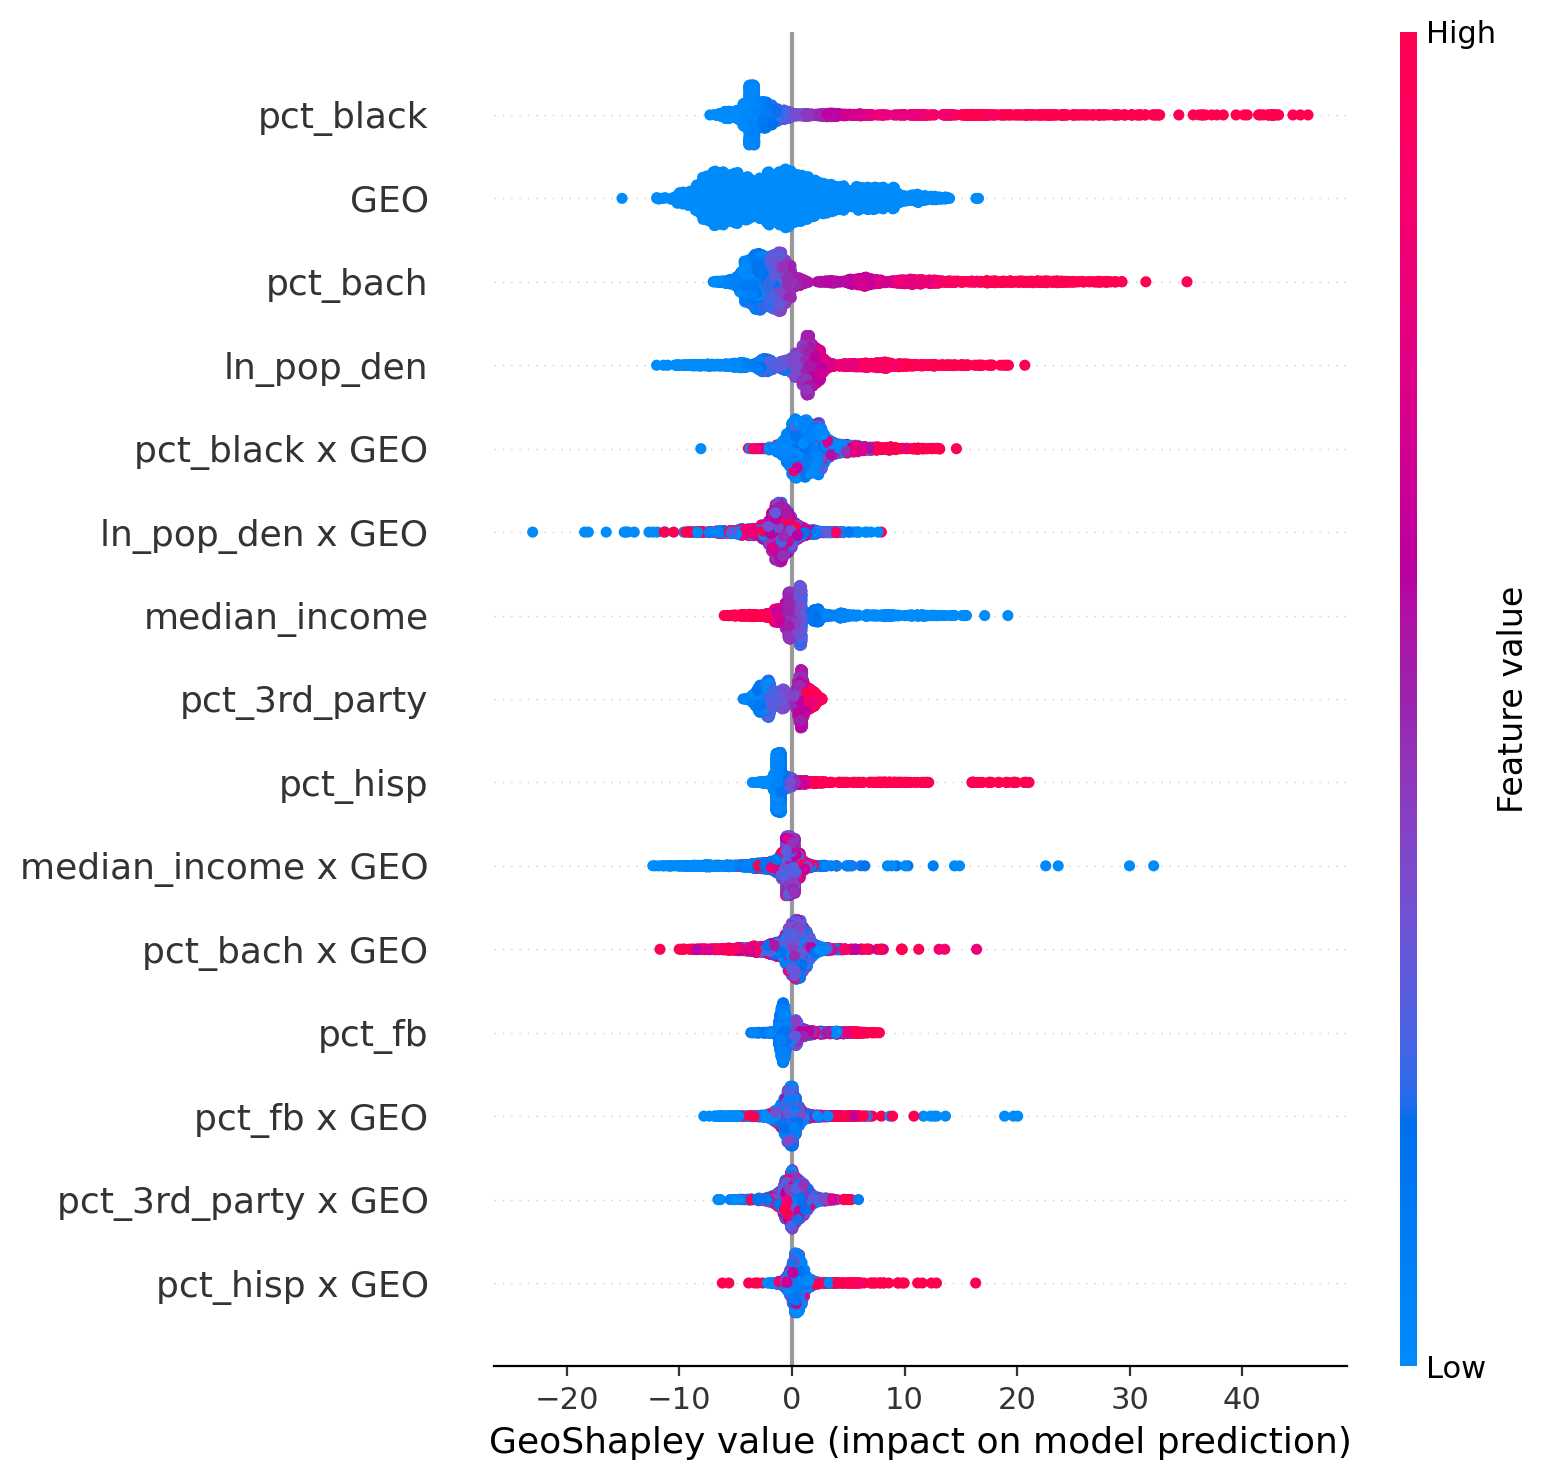

In [128]:
rslt.summary_plot()

In [245]:
rslt_list_new = rslt_list[:]

In [246]:
len(rslt_list_new)

500

In [247]:
mean_geo = np.array([rslt.geo for rslt in rslt_list_new]).mean(axis=0)

In [248]:
lower = np.percentile(np.array([rslt.geo for rslt in rslt_list_new]),2.5,axis=0)
upper = np.percentile(np.array([rslt.geo for rslt in rslt_list_new]),97.5,axis=0)

In [249]:
masked_geo = np.where((lower <= 0) & (upper >=0), np.nan, mean_geo)

In [250]:
mean_base = np.mean([rslt.base_value for rslt in rslt_list_new])

### Viz

In [417]:
import geopandas as gpd
us_county = gpd.read_file("data/cb_2018_us_county_500k")

In [326]:
us_county["county_id"] = us_county.GEOID.astype(int)

In [327]:
context = rslt.geo

In [328]:
state = counties.dissolve("state")

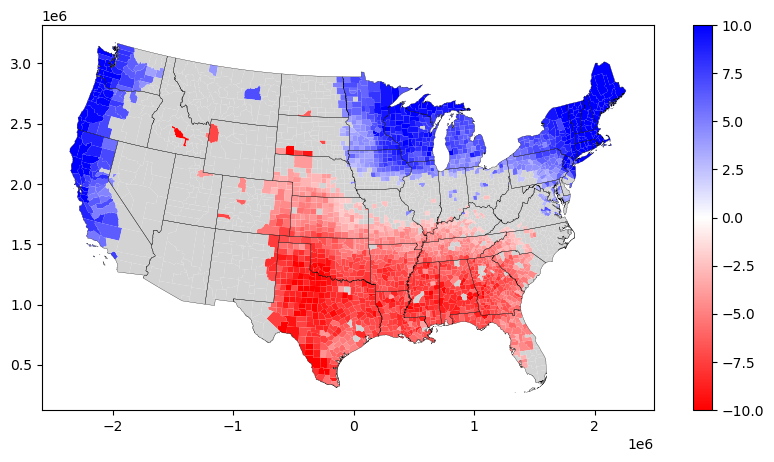

In [331]:
counties = gpd.GeoDataFrame(data.merge(us_county,on="county_id")).to_crs("ESRI:102039")


ax = counties.plot(column=masked_geo, cmap="bwr_r",vmin=-10,vmax=10,
                                                            legend=True,figsize=(10,5), missing_kwds={
             "color": "lightgrey"})

counties.dissolve("state").boundary.plot(ax=ax,color="black",lw=0.2)

#plt.savefig("Geo_contribution_XGBoost.png",dpi=300)

In [332]:
bootstrap_primary = []
bootstrap_geo=[]
bootstrap_geo_intera=[]
for rslt in rslt_list_new:
    bootstrap_primary.append(rslt.primary)
    bootstrap_geo.append(rslt.geo)
    bootstrap_geo_intera.append(rslt.geo_intera)

bootstrap_primary_low = np.percentile(np.array(bootstrap_primary), 2.5, axis=0)
bootstrap_primary_up = np.percentile(np.array(bootstrap_primary), 97.5, axis=0)

bootstrap_geo_low = np.percentile(np.array(bootstrap_geo), 2.5, axis=0)
bootstrap_geo_up = np.percentile(np.array(bootstrap_geo), 97.5, axis=0)

bootstrap_geo_intera_low = np.percentile(np.array(bootstrap_geo_intera), 2.5, axis=0)
bootstrap_geo_intera_up = np.percentile(np.array(bootstrap_geo_intera), 97.5, axis=0)

np.array(bootstrap_primary).shape

from pygam import LinearGAM, s, f
def smoother(X,y):
    lam = np.arange(40,201,20).reshape(-1,1)
    gam = LinearGAM(s(0),fit_intercept=False).gridsearch(X, y, lam=lam)
    
    for i, term in enumerate(gam.terms):
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    return XX, pdep,confi

In [333]:
primary = np.array(bootstrap_primary).mean(axis=0)
geo_intera = np.array(bootstrap_geo_intera).mean(axis=0)

array([ 1.00521804,  0.07060761, -1.83865288, ..., -2.02835867,
        5.61627645, 10.59274581])

100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9 of 9) |#########################

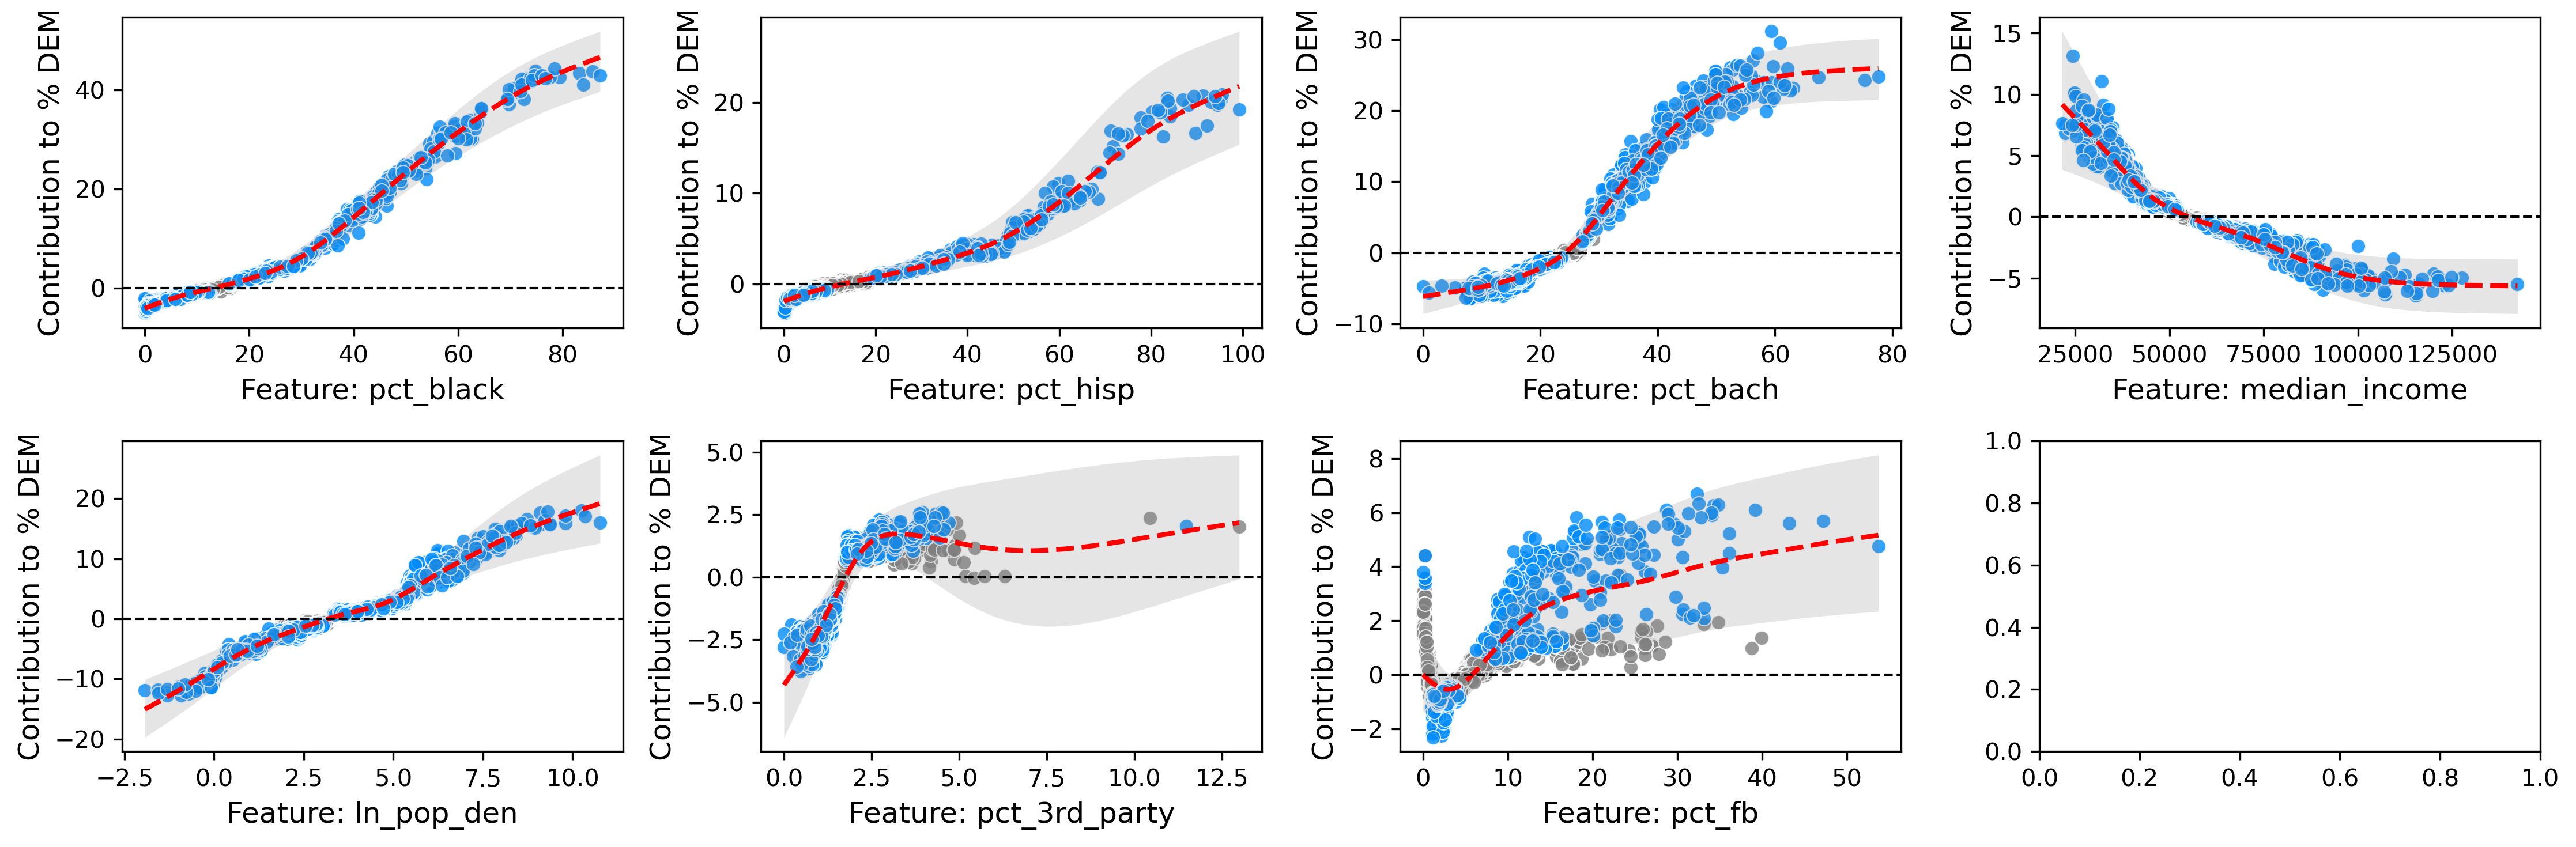

In [335]:
fig, axes = plt.subplots(2, 4,figsize=(15,5),dpi=300)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i==7: break
    df = pd.DataFrame(X_coords.values[:,i],columns=['d'])

    df["shap_val"] = primary[:,i]
    
    nonsig = np.logical_and(bootstrap_primary_low[:,i]<=0, bootstrap_primary_up[:,i]>=0)
    
    sns.scatterplot(ax=ax,x="d", y="shap_val",data=df[nonsig],color='grey',alpha=0.8)
    
    sns.scatterplot(ax=ax,x="d", y="shap_val",data=df[~nonsig],color=shap.plots.colors.blue_rgb,alpha=0.8)
    
    a,b,confi = smoother(df.d.values.reshape(-1,1),df.shap_val.values.reshape(-1,1))

    ax.plot(a,b,'--', color="red",lw=2)
    
    top = []
    bot = []

    
    order = np.argsort(X_coords.iloc[:,i].values)
    a1,b1,confi = smoother(X_coords.iloc[:,i].values[order].reshape(-1,1),bootstrap_primary_low[:][order][:,i].reshape(-1,1))
    a2,b2,confi = smoother(X_coords.iloc[:,i].values[order].reshape(-1,1),bootstrap_primary_up[:][order][:,i].reshape(-1,1))
    
    ax.fill_between(a1.reshape(-1),b1,b2,alpha=0.2,color='grey',linewidth=0)

    
    ax.axhline(y=0, color='black', linestyle='--',lw=1)
    
    ax.set_ylabel("Contribution to % DEM",fontsize=12)
    ax.set_xlabel("Feature: " + X_coords.columns[i],fontsize=12)
    

# Adjust the layout to prevent overlap of labels and titles
plt.tight_layout()

#plt.savefig("SHAP_partial dependence plots sig.png")


In [404]:
from matplotlib.colors import LinearSegmentedColormap

# Create a 'bwr' colormap
cmap1 = plt.get_cmap('bwr')
cmap2 = plt.get_cmap('bwr_r')

# Extract the red portion by using the upper half of the colormap (0.5 to 1)
reds_cmap = LinearSegmentedColormap.from_list('reds_cmap', cmap1(np.linspace(0.5, 1, 256)))

blues_cmap = LinearSegmentedColormap.from_list('blues_cmap', cmap2(np.linspace(0.5, 1, 256)))


In [480]:
import mgwr


def viz_svc(j):                
    coords = np.array(list(zip(X_coords.values[:,-2], X_coords.values[:,-1])))

    y_gwr = geo_intera[:,j].reshape(-1,1) + primary[:,j].reshape(-1,1)
    
    y_gwr = y_gwr
    
    X_gwr = (X_coords.values - X_coords.values.mean(axis=0))[:,j].reshape(-1,1)
    gwr_selector = mgwr.sel_bw.Sel_BW(coords, y_gwr, X_gwr,constant=True)
    gwr_bw = gwr_selector.search(bw_min=2)
    gwr_model = mgwr.gwr.GWR(coords, y_gwr, X_gwr, gwr_bw,constant=True).fit()

    beta = gwr_model.params[:,1]
    
    
    condition = (bootstrap_geo_intera_up[:,j] >= 0) & (bootstrap_geo_intera_low[:,j] <= 0) & \
                           (bootstrap_primary_up[:,j] >=0) & (bootstrap_primary_low[:,j] <=0)

    null = counties[condition]

    ax = null.plot(markersize=1,color='lightgray',alpha=0.5,figsize=(10,5))

    keep = counties[~counties.index.isin(null.index)]

    keep.plot(ax=ax,column=(beta[~condition]),vmin=0,vmax=4,
                  legend=True,figsize=(10,5),
                  cmap=blues_cmap)

    counties.dissolve("state").boundary.plot(ax=ax,color="black",lw=0.2)


43.0
0.9239112858146101


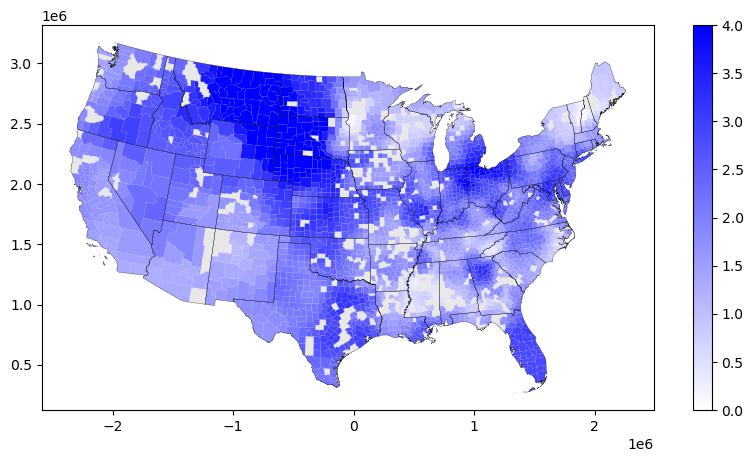

In [481]:
viz_svc(4)

29.0
0.9877781807449885


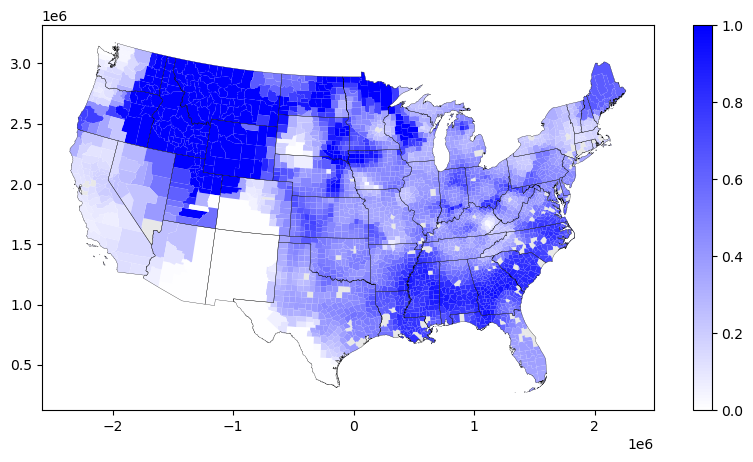

In [478]:
viz_svc(0)

26.0
0.9595667279743859


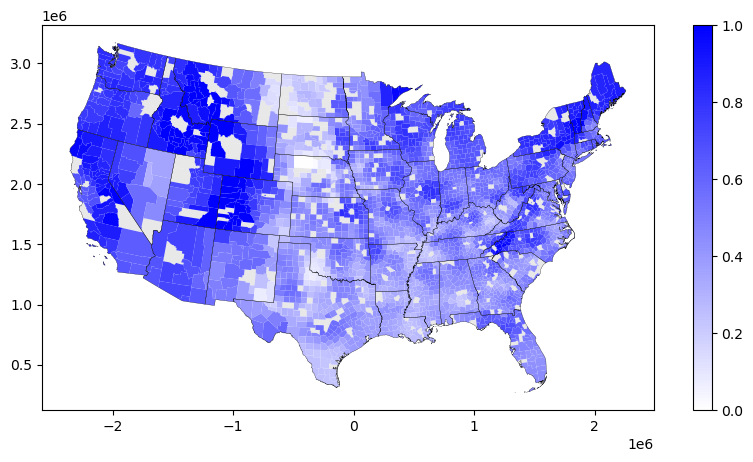

In [479]:
viz_svc(2)

In [539]:
x = np.array(['Geo'] + list(X_coords.columns[:-2]))

y1 = np.insert(np.abs(primary).mean(axis=0), 0, 0)

y2 = np.insert(np.abs(geo_intera).mean(axis=0), 0, np.abs(mean_geo).mean(axis=0))

total = y1 + y2

sort_index = np.argsort(total)

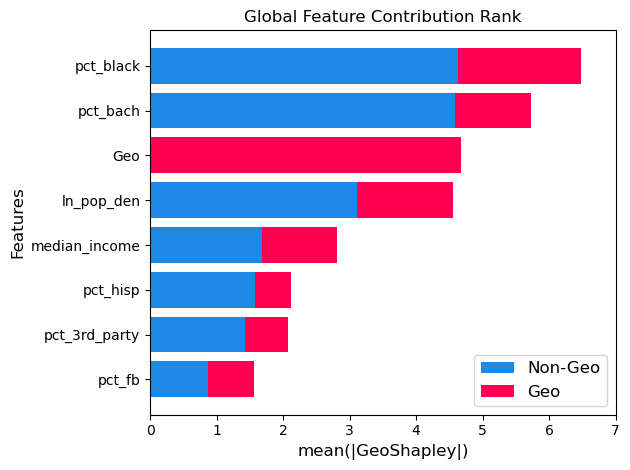

In [542]:
plt.barh(x[sort_index], y1[sort_index], color='#1E88E5')
plt.barh(x[sort_index], y2[sort_index], left=y1[sort_index], color='#FF0051')

plt.xlabel("mean(|GeoShapley|)",fontsize=12)
plt.ylabel("Features",fontsize=12)
plt.legend(["Non-Geo","Geo"],fontsize=12)
plt.xlim(0,7)
plt.title("Global Feature Contribution Rank")
plt.tight_layout()
#plt.savefig("Ranking.png",dpi=300)